In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_raw = pd.read_csv('./stroke_data_dummies.csv')

In [3]:
df_r = df_raw[df_raw.Gender_Other == 0]

In [4]:
df = df_r.drop(columns = ['Unnamed: 0','id','Obesity','Gender_Other'])

In [5]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,marriage,Gender_Female,Gender_Male,Work_Govt_job,Work_Never_worked,Work_Private,Work_Self-employed,Work_children,smoking_Unknown,smoking_formerly smoked,smoking_never smoked,smoking_smokes,Residence_Rural,Residence_Urban
0,67.0,0,1,228.69,36.6,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1
1,80.0,0,1,105.92,32.5,1,1,0,1,0,0,1,0,0,0,0,1,0,1,0
2,49.0,0,0,171.23,34.4,1,1,1,0,0,0,1,0,0,0,0,0,1,0,1
3,79.0,1,0,174.12,24.0,1,1,1,0,0,0,0,1,0,0,0,1,0,1,0
4,81.0,0,0,186.21,29.0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1


In [6]:
X = df.drop(columns = ['stroke', 'hypertension'])
X

,age,heart_disease,avg_glucose_level,bmi,marriage,Gender_Female,Gender_Male,Work_Govt_job,Work_Never_worked,Work_Private,Work_Self-employed,Work_children,smoking_Unknown,smoking_formerly smoked,smoking_never smoked,smoking_smokes,Residence_Rural,Residence_Urban
0,67.0,1,228.69,36.6,1,0,1,0,0,1,0,0,0,1,0,0,0,1
1,80.0,1,105.92,32.5,1,0,1,0,0,1,0,0,0,0,1,0,1,0
2,49.0,0,171.23,34.4,1,1,0,0,0,1,0,0,0,0,0,1,0,1
3,79.0,0,174.12,24.0,1,1,0,0,0,0,1,0,0,0,1,0,1,0
4,81.0,0,186.21,29.0,1,0,1,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,13.0,0,103.08,18.6,0,1,0,0,0,0,0,1,1,0,0,0,1,0
4905,81.0,0,125.20,40.0,1,1,0,0,0,0,1,0,0,0,1,0,0,1
4906,35.0,0,82.99,30.6,1,1,0,0,0,0,1,0,0,0,1,0,1,0
4907,51.0,0,166.29,25.6,1,0,1,0,0,1,0,0,0,1,0,0,1,0


In [7]:
df_0 = df[df['hypertension'] == 0]
df_0 = df_0.drop(columns = ['hypertension'])
df_0

,age,heart_disease,avg_glucose_level,bmi,stroke,marriage,Gender_Female,Gender_Male,Work_Govt_job,Work_Never_worked,Work_Private,Work_Self-employed,Work_children,smoking_Unknown,smoking_formerly smoked,smoking_never smoked,smoking_smokes,Residence_Rural,Residence_Urban
0,67.0,1,228.69,36.6,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1
1,80.0,1,105.92,32.5,1,1,0,1,0,0,1,0,0,0,0,1,0,1,0
2,49.0,0,171.23,34.4,1,1,1,0,0,0,1,0,0,0,0,0,1,0,1
4,81.0,0,186.21,29.0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1
6,69.0,0,94.39,22.8,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,13.0,0,103.08,18.6,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0
4905,81.0,0,125.20,40.0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1
4906,35.0,0,82.99,30.6,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0
4907,51.0,0,166.29,25.6,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0


In [8]:
df_1 = df[df['hypertension'] == 1]
df_1 = df_1.drop(columns = ['hypertension'])
df_1

,age,heart_disease,avg_glucose_level,bmi,stroke,marriage,Gender_Female,Gender_Male,Work_Govt_job,Work_Never_worked,Work_Private,Work_Self-employed,Work_children,smoking_Unknown,smoking_formerly smoked,smoking_never smoked,smoking_smokes,Residence_Rural,Residence_Urban
3,79.0,0,174.12,24.0,1,1,1,0,0,0,0,1,0,0,0,1,0,1,0
5,74.0,1,70.09,27.4,1,1,0,1,0,0,1,0,0,0,0,1,0,1,0
8,81.0,0,80.43,29.7,1,1,1,0,0,0,1,0,0,0,0,1,0,1,0
12,50.0,0,167.41,30.9,1,1,1,0,0,0,0,1,0,0,0,1,0,1,0
14,75.0,0,221.29,25.8,1,1,0,1,0,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4788,76.0,0,267.60,30.5,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0
4791,64.0,0,196.26,34.5,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
4890,64.0,0,76.89,30.2,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1
4893,59.0,0,95.05,30.9,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0


In [9]:
y_0 = df_0['stroke']
x_0 = df_0.drop(columns = ['stroke'])

In [10]:
y_1 = df_1['stroke']
x_1 = df_1.drop(columns = ['stroke'])

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Model for controlled group

In [12]:
rfc = RandomForestClassifier(random_state=60)
score_pre_0 = cross_val_score(rfc,x_0,y_0,cv=5).mean()
score_pre_0

0.9654479523687296

0.9663450649997735 151


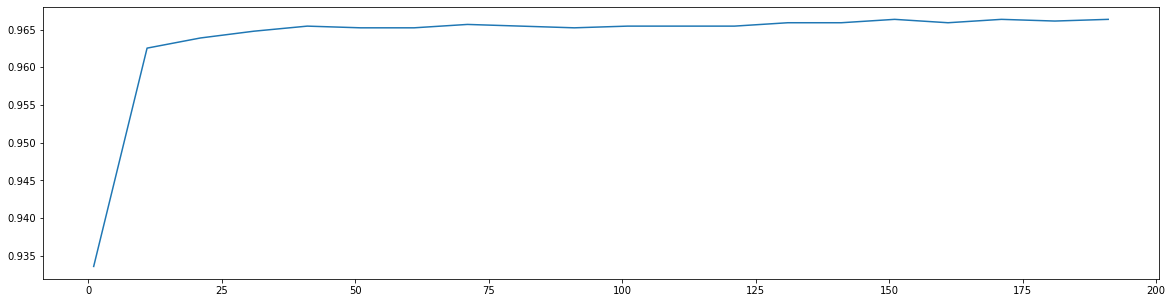

In [13]:
scorel = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                 n_jobs=-1,
                                random_state=60)
    score = cross_val_score(rfc,x_0,y_0,cv=5).mean()
    scorel.append(score)

print(max(scorel),(scorel.index(max(scorel))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.show()

0.9663450649997735 150


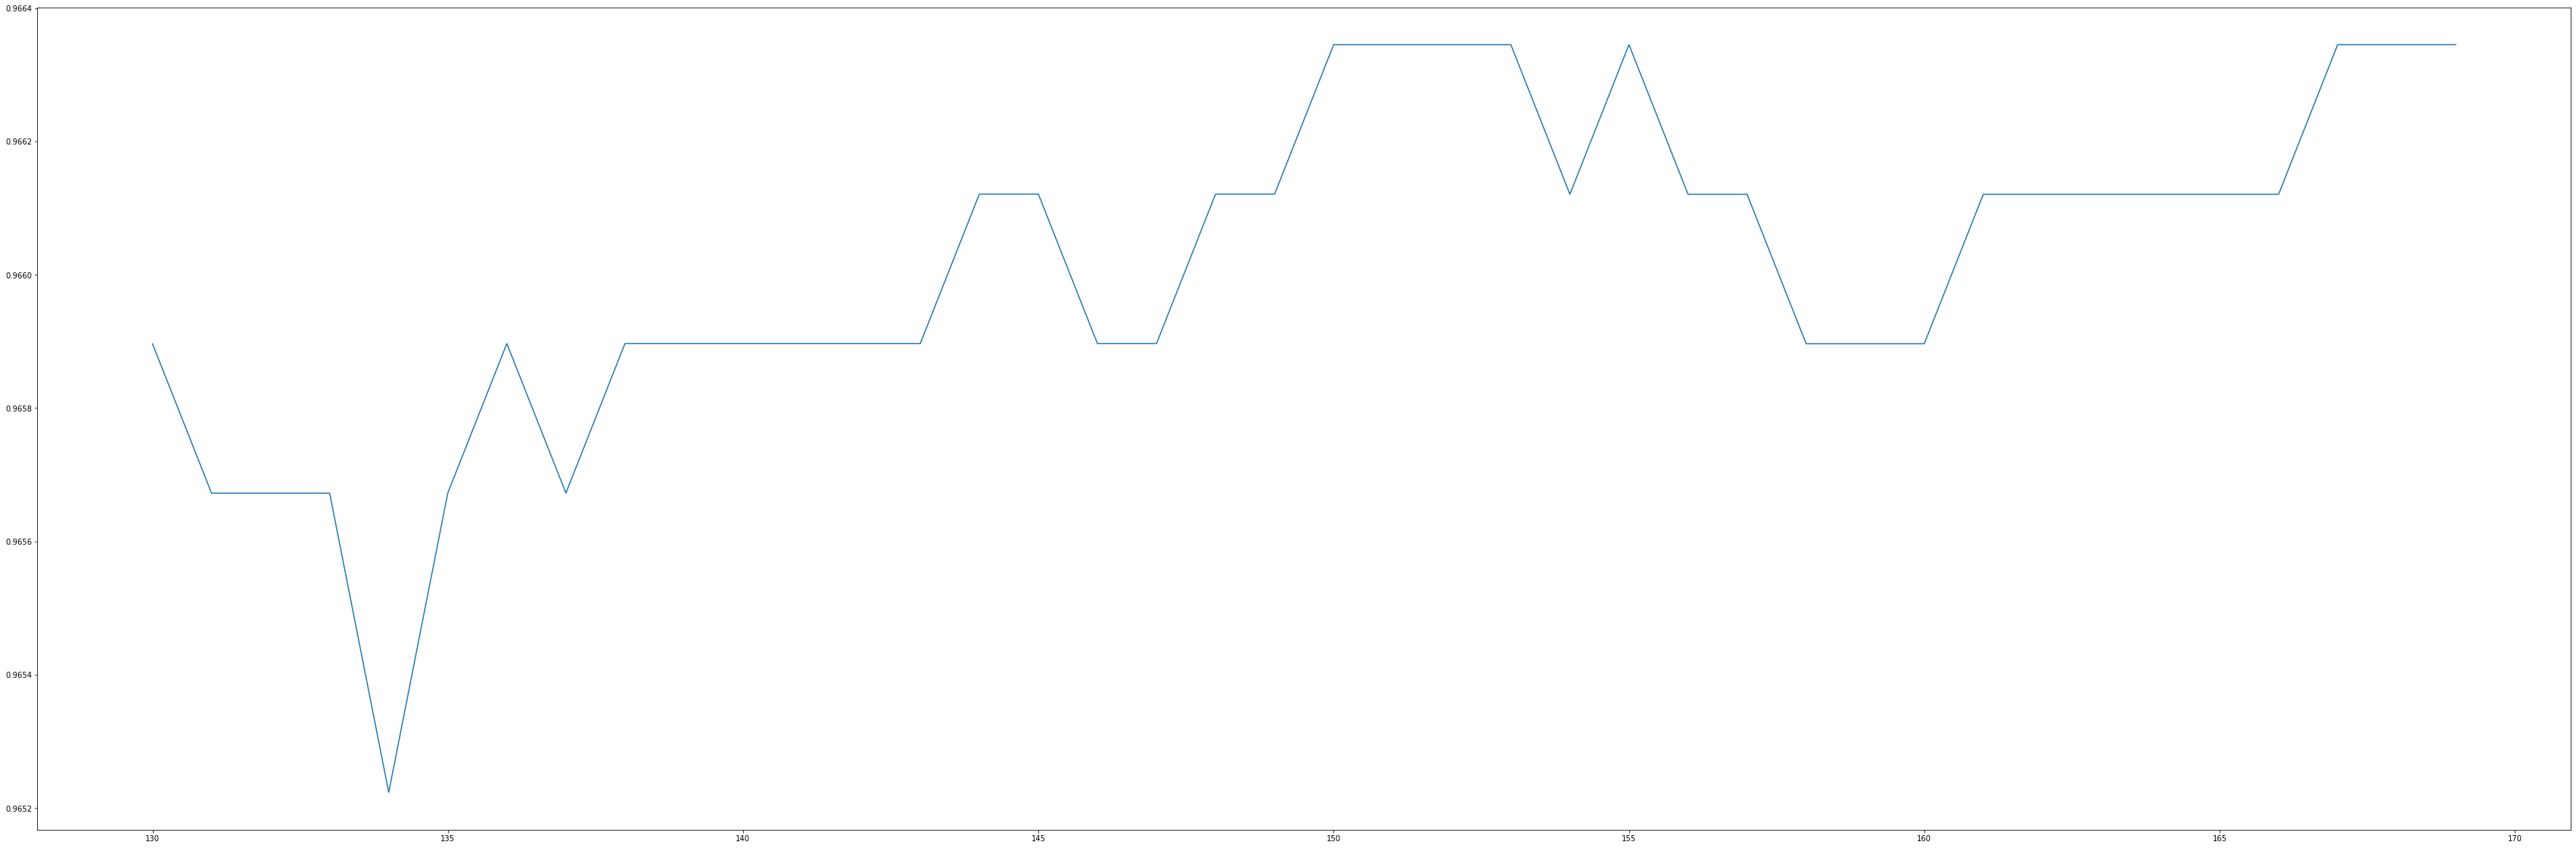

In [14]:
scorel = []
for i in range(130,170):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                 n_jobs=-1,
                                random_state=60)
    score = cross_val_score(rfc,x_0,y_0,cv=5).mean()
    scorel.append(score)

print(max(scorel),([*range(130,170)][scorel.index(max(scorel))]))
plt.figure(figsize=[60,20])
plt.plot(range(130,170),scorel)
plt.show()

In [15]:
param_grid = {'max_depth':np.arange(1, 30, 1)}
rfc = RandomForestClassifier(n_estimators=150
                             ,random_state=60
                             )
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(x_0,y_0)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=150,
                                              random_state=60),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [16]:
GS.best_params_

{'max_depth': 1}

In [17]:
GS.best_score_

0.9665695318909071

In [18]:
param_grid = {'max_features':np.arange(1,20,1)}
rfc = RandomForestClassifier(n_estimators=150
                             ,random_state=60
                             )
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(x_0,y_0)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=150,
                                              random_state=60),
             param_grid={'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [19]:
GS.best_params_

{'max_features': 4}

In [20]:
GS.best_score_

0.9661208497531367

In [21]:
param_grid={'min_samples_leaf':np.arange(1, 20, 1)}
rfc = RandomForestClassifier(n_estimators=150
                             ,random_state=60
                             )
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(x_0,y_0)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=150,
                                              random_state=60),
             param_grid={'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [22]:
GS.best_params_

{'min_samples_leaf': 2}

In [23]:
GS.best_score_

0.9665695318909071

In [24]:
param_grid={'min_samples_split':np.arange(2, 2+20, 1)}
rfc = RandomForestClassifier(n_estimators=150
                             ,random_state=60
                             )
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(x_0,y_0)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=150,
                                              random_state=60),
             param_grid={'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21])})

In [25]:
GS.best_params_

{'min_samples_split': 6}

In [26]:
GS.best_score_

0.9665695318909071

In [27]:
rfc_0 = RandomForestClassifier(n_estimators=150,max_depth = 1,random_state=60)
score_0 = cross_val_score(rfc_0,x_0,y_0,cv=5).mean()
score_0

0.9665695318909071

In [28]:
score_0 - score_pre_0

0.0011215795221775071

# Model for treatment group

In [29]:
rfc = RandomForestClassifier(n_estimators=100,random_state=90)
score_pre_1 = cross_val_score(rfc,x_1,y_1,cv=5).mean()
score_pre_1

0.8581196581196581

0.8581196581196581 101


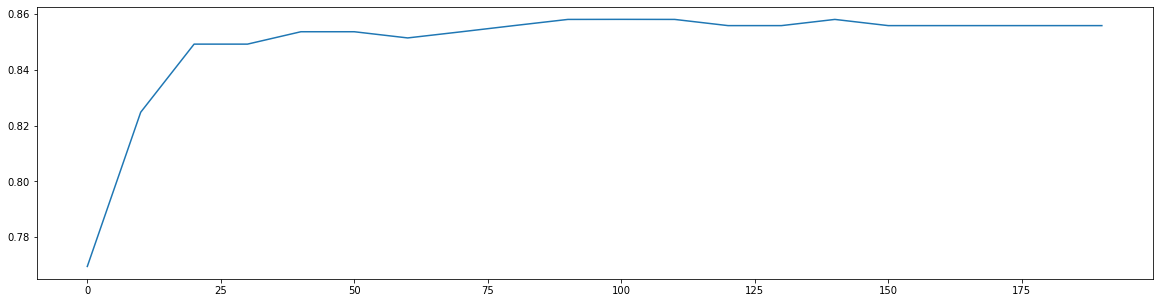

In [30]:
scorel = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                 n_jobs=-1,
                                random_state=80)
    score = cross_val_score(rfc,x_1,y_1,cv=5).mean()
    scorel.append(score)

print(max(scorel),(scorel.index(max(scorel))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(0,200,10),scorel)
plt.show()

0.8581196581196581 84


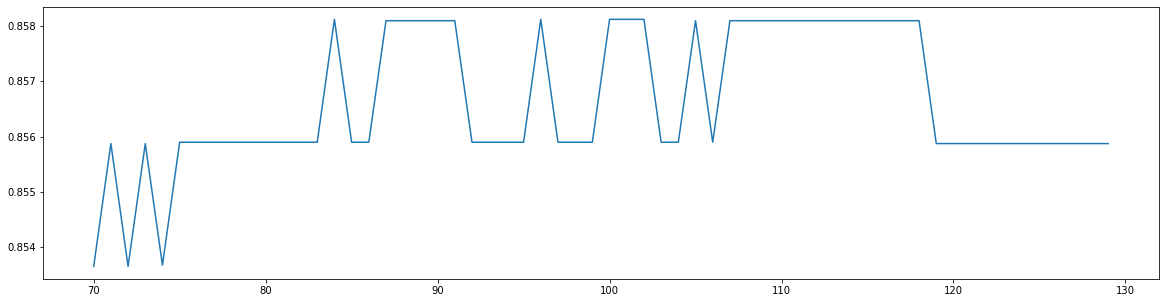

In [31]:
scorel = []
for i in range(70,130):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                 n_jobs=-1,
                                random_state=80)
    score = cross_val_score(rfc,x_1,y_1,cv=5).mean()
    scorel.append(score)

print(max(scorel),([*range(70,130)][scorel.index(max(scorel))]))
plt.figure(figsize=[20,5])
plt.plot(range(70,130),scorel)
plt.show()

In [32]:
param_grid = {'max_depth':np.arange(1, 30, 1)}
rfc = RandomForestClassifier(n_estimators=100
                             ,random_state=80
                             )
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(x_1,y_1)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=80),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [33]:
GS.best_params_

{'max_depth': 1}

In [34]:
GS.best_score_

0.866959706959707

In [35]:
param_grid = {'max_features':np.arange(1,20,1)}
rfc = RandomForestClassifier(n_estimators=100
                             ,random_state=80
                             )
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(x_1,y_1)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=80),
             param_grid={'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [36]:
GS.best_params_

{'max_features': 6}

In [37]:
GS.best_score_

0.8603174603174603

In [38]:
param_grid={'min_samples_leaf':np.arange(1, 20, 1)}
rfc = RandomForestClassifier(n_estimators=100
                             ,random_state=80
                             )
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(x_1,y_1)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=80),
             param_grid={'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [39]:
GS.best_params_

{'min_samples_leaf': 3}

In [40]:
GS.best_score_

0.866959706959707

In [41]:
param_grid={'min_samples_split':np.arange(2, 2+20, 1)}
rfc = RandomForestClassifier(n_estimators=100
                             ,random_state=80
                             )
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(x_1,y_1)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=80),
             param_grid={'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21])})

In [42]:
GS.best_params_

{'min_samples_split': 6}

In [43]:
GS.best_score_

0.8691819291819293

In [44]:
rfc_1 = RandomForestClassifier(n_estimators=100,max_depth = 1, random_state=80)
score_1 = cross_val_score(rfc_1,x_1,y_1,cv=5).mean()
score_1

0.866959706959707

In [45]:
score_1 - score_pre_1

0.008840048840048964

# Outcome modeling

In [46]:
from scipy import stats
import scipy.stats

In [47]:
rfc0 = rfc_0.fit(x_0, y_0)

In [48]:
predict_0 = rfc0.predict(X)
mean_0 = predict_0.mean()
mean_0

0.0

In [49]:
rfc1 = rfc_1.fit(x_1, y_1)

In [50]:
predict_1 = rfc1.predict(X)
mean_1 = predict_1.mean()
mean_1

0.0

In [51]:
ATE_outcome = mean_1 - mean_0
ATE_outcome

0.0

In [52]:
t,pval = scipy.stats.ttest_ind(predict_0,predict_1,equal_var=False,alternative='less')
print(t,pval)

nan nan
